In [27]:
from css_utility import *
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from scipy.stats import norm
import itertools
import pandas as pd
import seaborn as sns
%matplotlib inline
import pickle

In [31]:
gene_css_all=pickle.load(open("../database/temp_files/css_gene_unit_lst_all","rb"))

In [34]:
type(gene_css_all)

list

In [33]:
len(gene_css_all)

24

In [35]:
chr_gene_css=gene_css_all[0]  # test using a single chromosome

In [41]:
type(chr_gene_css[1])

str

In [107]:
def complexity_overview(chr_gene_css):
    abs_uniq_all=[]
    abs_switch_all=[]
    compl_uniq_all=[]
    compl_swit_all=[]
    for num in range(len(chr_gene_css)):
        gene_css=chr_gene_css[num]
        gene_css_len=len(gene_css)
        css_uniq=len(set(gene_css)) # only the unique css (min=1, max=gene_css_len)
        
        tot_char=""
        for i, char in enumerate(gene_css):
            if i==0 or char!=gene_css[i-1]:
                tot_char+=char
            css_switch=len(tot_char) # num. of swtiching in css (min=1, max=gene_css_len)
            complexity_uniq=css_uniq/gene_css_len
            complexity_swit=css_switch/gene_css_len
            
        abs_uniq_all.append(css_uniq)
        abs_switch_all.append(css_switch)
        compl_uniq_all.append(complexity_uniq)
        compl_swit_all.append(complexity_swit)
    
    return abs_uniq_all,abs_switch_all,compl_uniq_all,compl_swit_all
        

In [108]:
abs_uniq_all,abs_switch_all,compl_uniq_all,compl_swit_all=complexity_overview(chr_gene_css)

In [112]:
len(abs_switch_all)

4397

<AxesSubplot:ylabel='Count'>

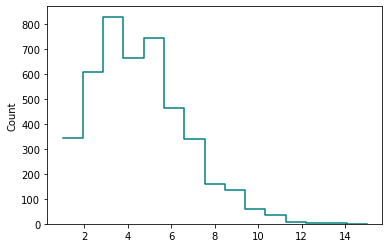

In [130]:
sns.histplot(abs_uniq_all, color="teal", element="step", fill=False, bins=15)

<AxesSubplot:ylabel='Count'>

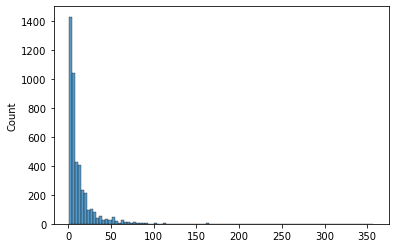

In [129]:
sns.histplot(abs_switch_all, bins=100)

<AxesSubplot:ylabel='Count'>

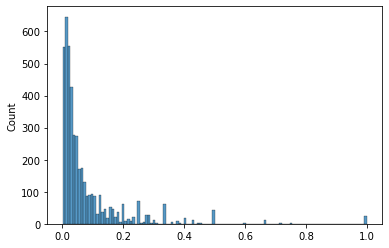

In [54]:
sns.histplot(compl_uniq_all)

<AxesSubplot:ylabel='Count'>

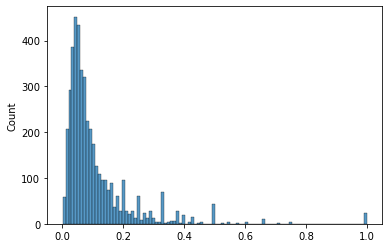

In [55]:
sns.histplot(compl_swit_all)

In [66]:
len(compl_swit_all)

4397

In [68]:
pd.DataFrame(list(zip(compl_swit_all,compl_swit_all)), columns=["uniq","switch"])

,uniq,switch
0,0.014925,0.014925
1,1.000000,1.000000
2,0.050955,0.050955
3,0.050955,0.050955
4,0.050955,0.050955
...,...,...
4392,0.075000,0.075000
4393,0.075000,0.075000
4394,0.075000,0.075000
4395,0.050000,0.050000


In [153]:
def complexity_overview_mat(chr_gene_css):
    abs_uniq_all=[]
    abs_switch_all=[]
    gene_len_all=[]
    compl_uniq_all=[]
    compl_swit_all=[]
    for num in range(len(chr_gene_css)):
        gene_css=chr_gene_css[num]
        gene_css_len=len(gene_css)
        css_uniq=len(set(gene_css)) # only the unique css (min=1, max=gene_css_len)
        
        tot_char=""
        for i, char in enumerate(gene_css):
            if i==0 or char!=gene_css[i-1]:
                tot_char+=char
            css_switch=len(tot_char) # num. of swtiching in css (min=1, max=gene_css_len)
            complexity_uniq=css_uniq/gene_css_len
            complexity_swit=css_switch/gene_css_len
        
        gene_len_all.append(gene_css_len)
        abs_uniq_all.append(css_uniq)
        abs_switch_all.append(css_switch)
        compl_uniq_all.append(complexity_uniq)
        compl_swit_all.append(complexity_swit)
        
    data=list(zip(gene_len_all,abs_uniq_all, abs_switch_all,compl_uniq_all,compl_swit_all))
    df=pd.DataFrame(data,columns=["length","uniq","switch","uniq_pro","switch_pro"])
    df=df[df["length"]>=2]  # remove when the length = 1 unit (=200 bps)
    
    return df

In [154]:
df=complexity_overview_mat(chr_gene_css)

In [155]:
df.sort_values(by="length")

,length,uniq,switch,uniq_pro,switch_pro
2538,2,1,1,0.500000,0.500000
2021,2,1,1,0.500000,0.500000
339,2,1,1,0.500000,0.500000
2020,2,1,1,0.500000,0.500000
2019,2,1,1,0.500000,0.500000
...,...,...,...,...,...
2377,5411,14,156,0.002587,0.028830
2378,5411,14,156,0.002587,0.028830
1569,6263,11,252,0.001756,0.040236
1414,7453,10,123,0.001342,0.016503


In [158]:
# threshold...
np.mean(compl_swit_all)

0.10843204868285294

In [162]:
df_comp=df[df["switch_pro"]>np.mean(compl_swit_all)]

In [163]:
df_less=df[df["switch_pro"]<=np.mean(compl_swit_all)]

In [164]:
df_less

,length,uniq,switch,uniq_pro,switch_pro
0,67,1,1,0.014925,0.014925
2,157,5,8,0.031847,0.050955
3,157,5,8,0.031847,0.050955
4,157,5,8,0.031847,0.050955
5,157,5,8,0.031847,0.050955
...,...,...,...,...,...
4392,40,3,3,0.075000,0.075000
4393,40,3,3,0.075000,0.075000
4394,40,3,3,0.075000,0.075000
4395,60,3,3,0.050000,0.050000


In [165]:
df_comp

,length,uniq,switch,uniq_pro,switch_pro
7,37,3,5,0.081081,0.135135
9,75,7,11,0.093333,0.146667
10,22,3,3,0.136364,0.136364
11,3,1,1,0.333333,0.333333
12,3,1,1,0.333333,0.333333
...,...,...,...,...,...
4367,3,2,2,0.666667,0.666667
4373,151,3,20,0.019868,0.132450
4387,12,3,3,0.250000,0.250000
4390,74,4,9,0.054054,0.121622


In [169]:
df.loc[df_comp["switch_pro"]==1.0]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<AxesSubplot:xlabel='switch_pro', ylabel='Count'>

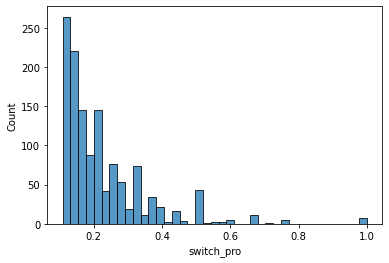

In [166]:
sns.histplot(df_comp["switch_pro"])

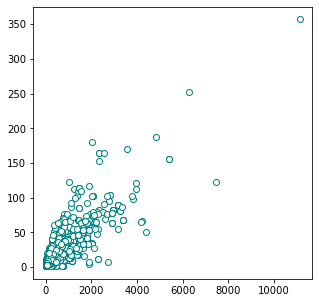

In [156]:
figure=plt.figure(figsize=(5,5))
plt.scatter(df[["length"]],df[["switch"]], c="white",edgecolors="teal")

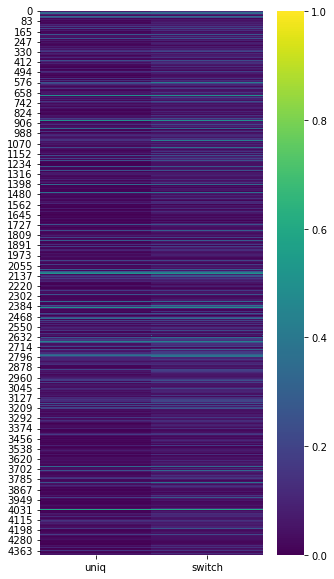

In [106]:
figure=plt.figure(figsize=(5,10))
sns.heatmap(df[["uniq","switch"]],cmap='viridis', vmin=0, vmax=1)
plt.show()

In [29]:
complex_gene(gene_css_all, 1)

TypeError: a bytes-like object is required, not 'str'